In [35]:
import numpy as np
import os 
import h5py
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
import glob, json
import matplotlib.pyplot as plt
import torch

In [2]:
with open('config/knee2d.json', 'r') as f:
    dset_config = json.load(f)

In [3]:
train_sample = dset_config['val']

(38, 15, 640, 368) (38, 320, 320)


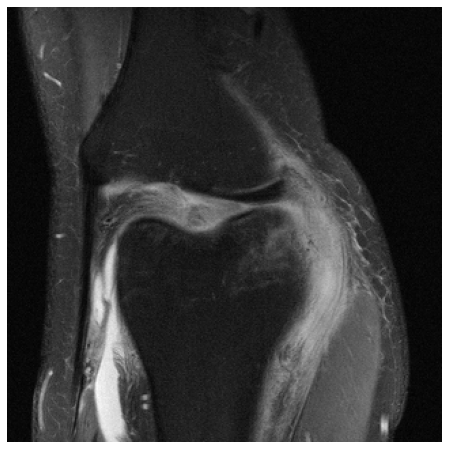

(33, 15, 640, 368) (33, 320, 320)


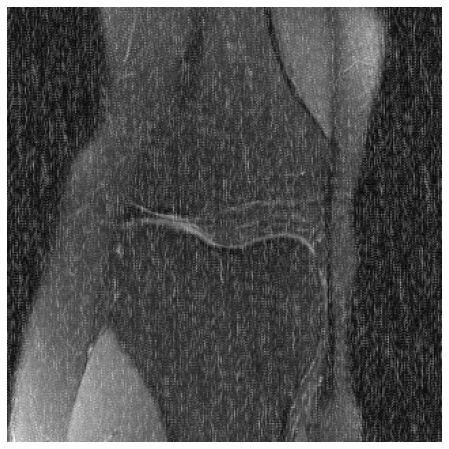

(30, 15, 640, 372) (30, 320, 320)


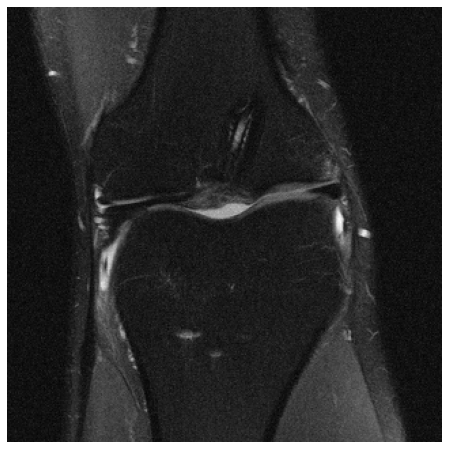

(42, 15, 640, 356) (42, 320, 320)


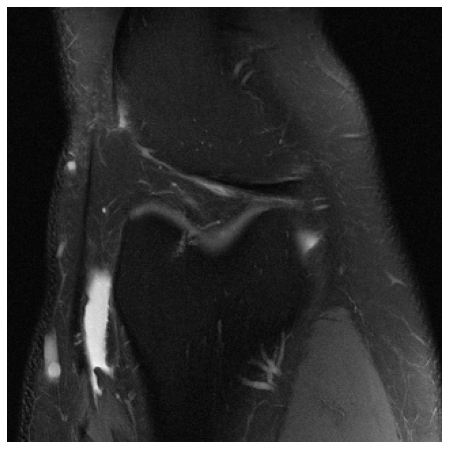

(35, 15, 640, 372) (35, 320, 320)


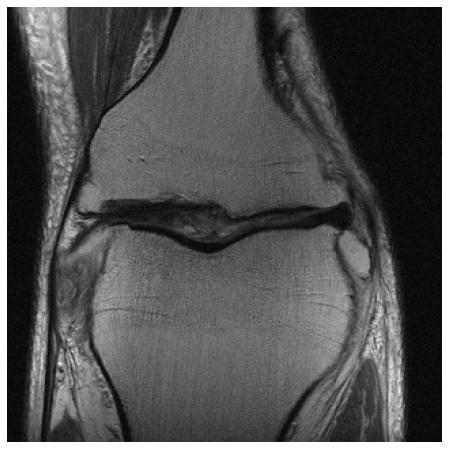

(42, 15, 640, 368) (42, 320, 320)


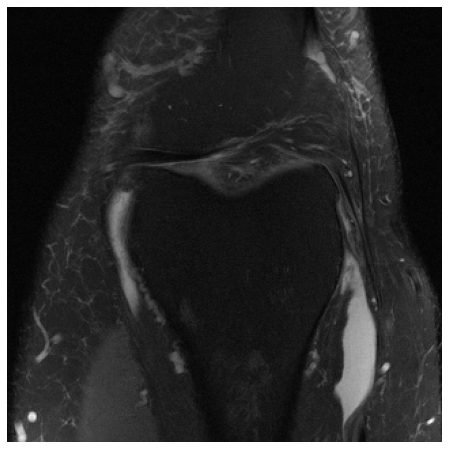

(38, 15, 640, 368) (38, 320, 320)


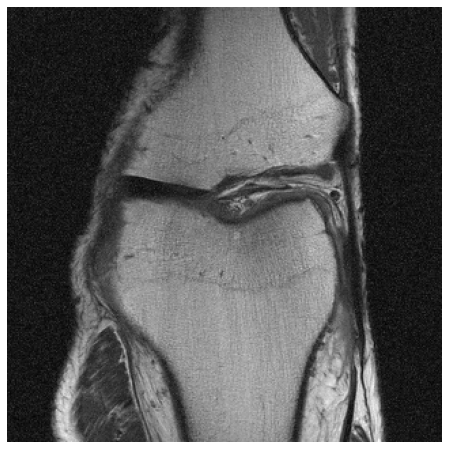

(42, 15, 640, 368) (42, 320, 320)


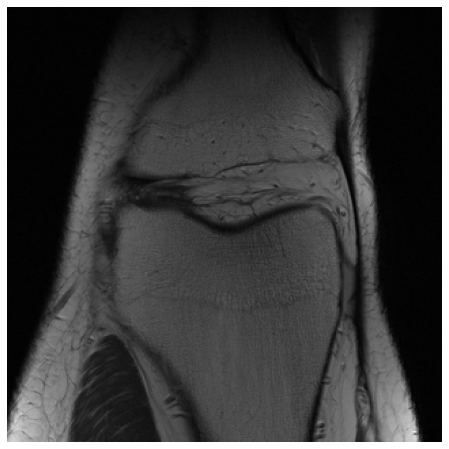

(37, 15, 640, 368) (37, 320, 320)


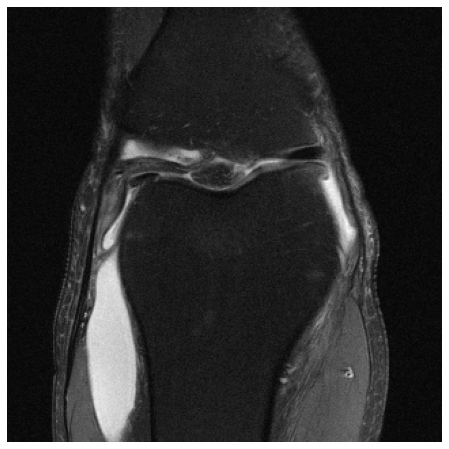

(33, 15, 640, 368) (33, 320, 320)


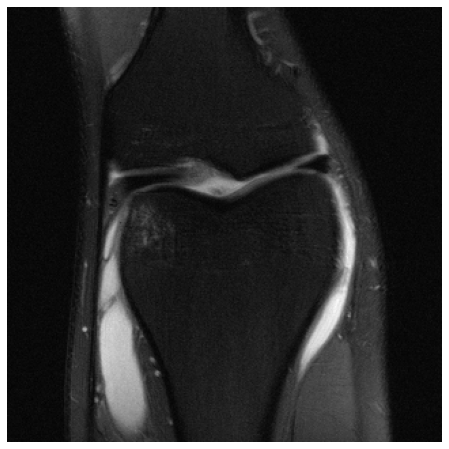

(33, 15, 640, 368) (33, 320, 320)


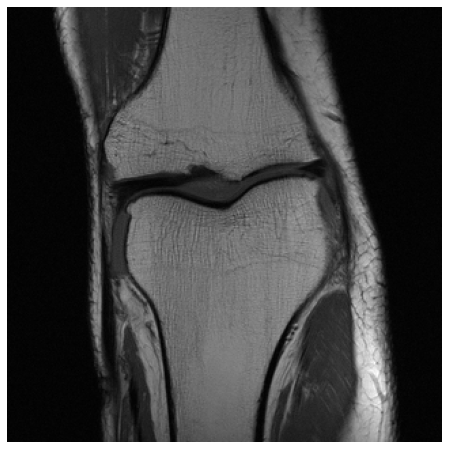

(30, 15, 640, 372) (30, 320, 320)


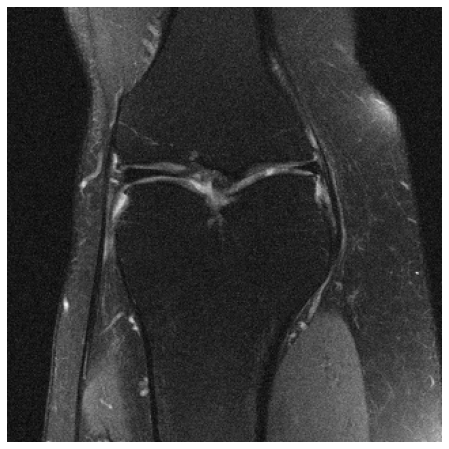

(38, 15, 640, 372) (38, 320, 320)


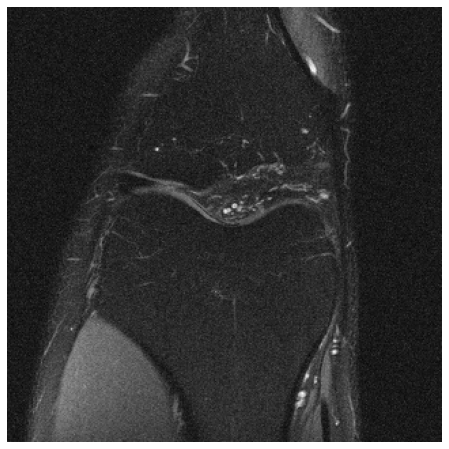

(30, 15, 640, 372) (30, 320, 320)


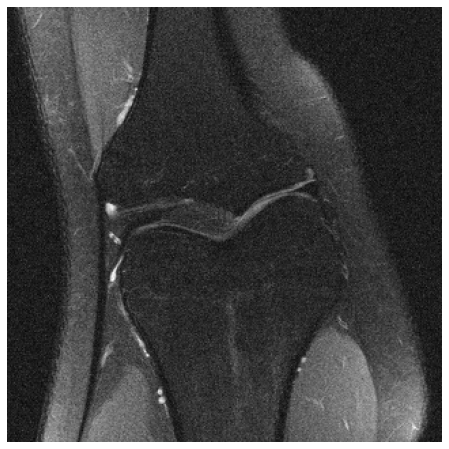

(35, 15, 640, 372) (35, 320, 320)


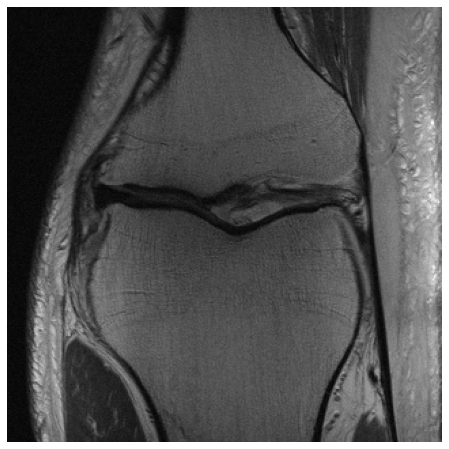

(34, 15, 640, 372) (34, 320, 320)


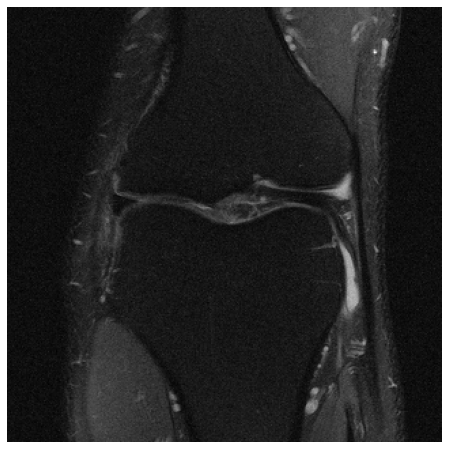

In [4]:
for train_hdf5 in train_sample:
    with h5py.File(train_hdf5, 'r') as hf:
        kspace = hf['kspace'][:]
        im = hf['reconstruction_rss'][:]
        print(kspace.shape, im.shape)
    plt.figure(figsize=(8,8))
    plt.imshow(np.abs(im[16]), cmap='gray')
    plt.axis('off')
    plt.show()

In [5]:
import pathlib
from fastmri.data import subsample
from fastmri.data import transforms, mri_data

# Create a mask function
mask_func = subsample.RandomMaskFunc(
    center_fractions=[0.08, 0.04],
    accelerations=[4, 8]
)

In [42]:
def data_transform(kspace, mask, target, data_attributes, filename, slice_num):
    # Transform the data into appropriate format
    # Here we simply mask the k-space and return the result
    kspace = transforms.to_tensor(kspace)
    masked_kspace, mask = transforms.apply_mask(kspace, mask_func)
    
    acq_start = data_attributes["padding_left"]
    acq_end = data_attributes["padding_right"]    
    max_value = data_attributes["max"]
    crop_size = torch.tensor([data_attributes["recon_size"][0], data_attributes["recon_size"][1]])
    
    return masked_kspace, mask, target, max_value


In [43]:
from fastmri.data import SliceDataset


In [44]:
dataset = SliceDataset(root= pathlib.Path('data/raw_knee2d'), transform=data_transform, challenge='multicoil')

In [45]:
ksp, mask, rec, max_value = dataset[0]

In [46]:
print(max_value)

0.00018395940825409758


In [21]:
import sigpy.plot as pl

In [24]:
import sigpy as sp


In [27]:
tmp = sp.from_pytorch(ksp, iscomplex=True)
print(tmp.shape)

(15, 640, 368)


In [29]:
%matplotlib notebook

<IPython.core.display.Javascript object>


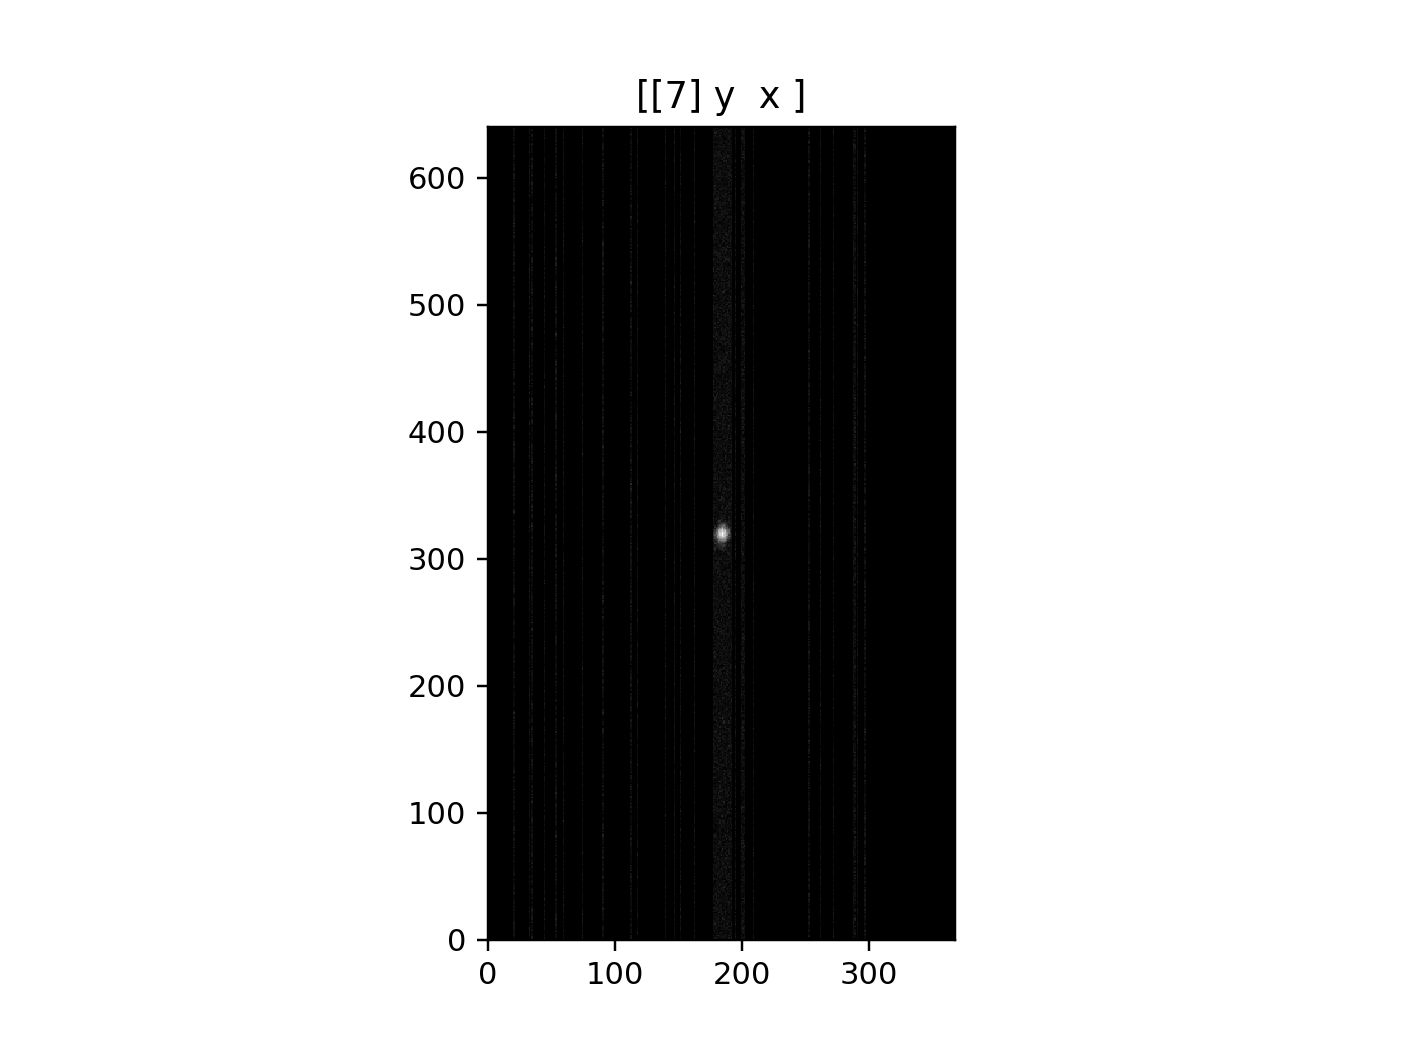

In [30]:
pl.ImagePlot(sp.from_pytorch(ksp, iscomplex=True))